<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Fabrizzio Pezzolla
- Nombre de alumno 2: Rodrigo Molina

### **Link de repositorio de GitHub:** [Repositorio insertado](https://github.com/frpezzolla/lab_mds)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [37]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [38]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [39]:
# Load the data
import pandas as pd
import plotly.express as px

energia_homero = pd.read_csv('energia_homero.csv')

# Transform the 'date' column to datetime format
energia_homero['date'] = pd.to_datetime(energia_homero['date'])

# Visualize the energy consumption using plotly
fig = px.line(energia_homero, x='date', y='Energy_kWh', title='Consumo de Energía en el Hogar de Homero')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import numpy as np

# Paso 0: Crear conjuntos de entrenamiento y prueba
train_data = energia_homero[energia_homero['date'] <= '2020-02-29']
test_data = energia_homero[energia_homero['date'] >= '2020-03-01']

# Paso 1: Crear Pipeline para la tendencia
def extract_time_features(df):
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    return df[['year', 'month', 'day']]

Pipeline_trend = Pipeline([
    ('time_features', FunctionTransformer(extract_time_features)),
    ('linear_model', LinearRegression())
])

# Paso 2: Entrenar el modelo lineal y obtener predicciones
X_train = train_data[['date']]
y_train = train_data['Energy_kWh']
X_test = test_data[['date']]
y_test = test_data['Energy_kWh']

Pipeline_trend.fit(X_train, y_train)
train_data['trend_pred'] = Pipeline_trend.predict(X_train)
test_data['trend_pred'] = Pipeline_trend.predict(X_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train, train_data['trend_pred'])
mae_test = mean_absolute_error(y_test, test_data['trend_pred'])

print(f'MAE Train: {mae_train}')
print(f'MAE Test: {mae_test}')

# Paso 3: Graficar las predicciones
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=y_train, mode='lines', name='Train Data'))
fig.add_trace(go.Scatter(x=test_data['date'], y=y_test, mode='lines', name='Test Data'))
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data['trend_pred'], mode='lines', name='Trend Prediction (Train)'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data['trend_pred'], mode='lines', name='Trend Prediction (Test)'))
fig.update_layout(title='Trend Prediction', xaxis_title='Date', yaxis_title='Energy_kWh')
fig.show()

# Paso 4: Graficar el error
train_data['error'] = y_train - train_data['trend_pred']
test_data['error'] = y_test - test_data['trend_pred']

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data['error'], mode='lines', name='Train Error'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data['error'], mode='lines', name='Test Error'))
fig.update_layout(title='Prediction Error', xaxis_title='Date', yaxis_title='Error')
fig.show()

# Paso 5: Crear Pipeline para la estacionalidad
def fourier_features(df, period, order):
    df = df.copy()
    time = (df['date'] - df['date'].min()).dt.days.values
    features = []
    for i in range(1, order + 1):
        features.append(np.sin(2 * np.pi * i * time / period))
        features.append(np.cos(2 * np.pi * i * time / period))
    return np.vstack(features).T

ORDER = 5
Pipeline_seasonal = Pipeline([
    ('fourier_features', FunctionTransformer(fourier_features, kw_args={'period': 365.25, 'order': ORDER})),
    ('linear_model', LinearRegression())
])

# Paso 6: Entrenar el nuevo modelo y obtener predicciones
Pipeline_seasonal.fit(X_train, y_train)
train_data['seasonal_pred'] = Pipeline_seasonal.predict(X_train)
test_data['seasonal_pred'] = Pipeline_seasonal.predict(X_test)

# Calcular MAE
mae_train_seasonal = mean_absolute_error(y_train, train_data['seasonal_pred'])
mae_test_seasonal = mean_absolute_error(y_test, test_data['seasonal_pred'])

print(f'MAE Train (Seasonal): {mae_train_seasonal}')
print(f'MAE Test (Seasonal): {mae_test_seasonal}')

# Paso 7: Graficar las predicciones estacionales
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=y_train, mode='lines', name='Train Data'))
fig.add_trace(go.Scatter(x=test_data['date'], y=y_test, mode='lines', name='Test Data'))
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data['seasonal_pred'], mode='lines', name='Seasonal Prediction (Train)'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data['seasonal_pred'], mode='lines', name='Seasonal Prediction (Test)'))
fig.update_layout(title=f'Seasonal Prediction from Fourier Series of order {ORDER}', xaxis_title='Date', yaxis_title='Energy_kWh')
fig.show()

# Graficar el error estacional
train_data['seasonal_error'] = y_train - train_data['seasonal_pred']
test_data['seasonal_error'] = y_test - test_data['seasonal_pred']

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data['seasonal_error'], mode='lines', name='Train Error (Seasonal)'))
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data['seasonal_error'], mode='lines', name='Test Error (Seasonal)'))
fig.update_layout(title='Seasonal Prediction Error', xaxis_title='Date', yaxis_title='Error')
fig.show()


MAE Train: 10.145899311584484
MAE Test: 8.556200329895512


MAE Train (Seasonal): 5.388602286790836
MAE Test (Seasonal): 14.845005129474124


## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [41]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [42]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Paso 1: Instalar y cargar Prophet

# Renombrar las columnas
train_data_prophet = train_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data_prophet = test_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Paso 2: Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(train_data_prophet)

# Preparar el dataset de predicciones
future = model.make_future_dataframe(periods=len(test_data_prophet))
forecast = model.predict(future)

# Paso 3: Graficar las predicciones y las componentes del modelo Prophet
fig1 = plot_plotly(model, forecast)
fig1.show()

fig2 = plot_components_plotly(model, forecast)
fig2.show()

# Paso 4: Calcular el MAE de la predicción en el conjunto de entrenamiento y de prueba
forecast_train = forecast[forecast['ds'].isin(train_data_prophet['ds'])]
forecast_test = forecast[forecast['ds'].isin(test_data_prophet['ds'])]

mae_train_prophet = mean_absolute_error(train_data_prophet['y'], forecast_train['yhat'])
mae_test_prophet = mean_absolute_error(test_data_prophet['y'], forecast_test['yhat'])

print(f'MAE Train (Prophet): {mae_train_prophet}')
print(f'MAE Test (Prophet): {mae_test_prophet}')

# Paso 5: Graficar el error
train_data_prophet['yhat'] = forecast_train['yhat'].values
test_data_prophet['yhat'] = forecast_test['yhat'].values

train_data_prophet['error'] = train_data_prophet['y'] - train_data_prophet['yhat']
test_data_prophet['error'] = test_data_prophet['y'] - test_data_prophet['yhat']

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=train_data_prophet['ds'], y=train_data_prophet['error'], mode='lines', name='Train Error (Prophet)'))
fig3.add_trace(go.Scatter(x=test_data_prophet['ds'], y=test_data_prophet['error'], mode='lines', name='Test Error (Prophet)'))
fig3.update_layout(title='Prediction Error (Prophet)', xaxis_title='Date', yaxis_title='Error')
fig3.show()

c:\Users\Fabrizzio\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



MAE Train (Prophet): 4.820456421417842
MAE Test (Prophet): 4.934029048086043


## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [43]:
# Paso 0: Seleccionar las variables exógenas y añadirlas a los conjuntos de entrenamiento y prueba
datos_frink = pd.read_csv('datos_frink.csv')

# Transformar la columna 'date' a formato datetime
datos_frink['date'] = pd.to_datetime(datos_frink['date'])

# Merge con los conjuntos de entrenamiento y prueba
train_data_merged = pd.merge(train_data, datos_frink, on='date', how='left')
test_data_merged = pd.merge(test_data, datos_frink, on='date', how='left')

# Renombrar las columnas para Prophet
train_data_merged = train_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data_merged = test_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Paso 1: Crear el modelo Prophet e incluir los regresores
model_with_regressors = Prophet()

# Añadir los regresores (variables exógenas) individualmente
model_with_regressors.add_regressor('Temp_max')
model_with_regressors.add_regressor('Temp_avg')
model_with_regressors.add_regressor('Temp_min')
model_with_regressors.add_regressor('Dew_max')
model_with_regressors.add_regressor('Dew_avg')
model_with_regressors.add_regressor('Dew_min')
model_with_regressors.add_regressor('Hum_max')
model_with_regressors.add_regressor('Hum_avg')
model_with_regressors.add_regressor('Hum_min')
model_with_regressors.add_regressor('Wind_max')
model_with_regressors.add_regressor('Wind_avg')
model_with_regressors.add_regressor('Wind_min')
model_with_regressors.add_regressor('Press_max')
model_with_regressors.add_regressor('Press_avg')
model_with_regressors.add_regressor('Press_min')

# Entrenar el modelo
model_with_regressors.fit(train_data_merged)

# Preparar el dataset de predicciones
future_with_regressors = model_with_regressors.make_future_dataframe(periods=len(test_data_merged))
future_with_regressors = pd.merge(future_with_regressors, datos_frink, left_on='ds', right_on='date', how='left').drop(columns=['date'])

# Realizar las predicciones
forecast_with_regressors = model_with_regressors.predict(future_with_regressors)

# Paso 2: Graficar las predicciones y las componentes del modelo Prophet
fig1 = plot_plotly(model_with_regressors, forecast_with_regressors)
fig1.show()

fig2 = plot_components_plotly(model_with_regressors, forecast_with_regressors)
fig2.show()

# Paso 3: Calcular el MAE de la predicción en el conjunto de entrenamiento y de prueba
forecast_train_with_regressors = forecast_with_regressors[forecast_with_regressors['ds'].isin(train_data_merged['ds'])]
forecast_test_with_regressors = forecast_with_regressors[forecast_with_regressors['ds'].isin(test_data_merged['ds'])]

mae_train_with_regressors = mean_absolute_error(train_data_merged['y'], forecast_train_with_regressors['yhat'])
mae_test_with_regressors = mean_absolute_error(test_data_merged['y'], forecast_test_with_regressors['yhat'])

print(f'MAE Train (Prophet with Regressors): {mae_train_with_regressors}')
print(f'MAE Test (Prophet with Regressors): {mae_test_with_regressors}')

# Paso 4: Graficar el error
train_data_merged['yhat'] = forecast_train_with_regressors['yhat'].values
test_data_merged['yhat'] = forecast_test_with_regressors['yhat'].values

train_data_merged['error'] = train_data_merged['y'] - train_data_merged['yhat']
test_data_merged['error'] = test_data_merged['y'] - test_data_merged['yhat']

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=train_data_merged['ds'], y=train_data_merged['error'], mode='lines', name='Train Error (Prophet with Regressors)'))
fig3.add_trace(go.Scatter(x=test_data_merged['ds'], y=test_data_merged['error'], mode='lines', name='Test Error (Prophet with Regressors)'))
fig3.update_layout(title='Prediction Error (Prophet with Regressors)', xaxis_title='Date', yaxis_title='Error')
fig3.show()

c:\Users\Fabrizzio\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



MAE Train (Prophet with Regressors): 4.667702685608435
MAE Test (Prophet with Regressors): 4.4695994065791815


## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [44]:
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.stattools import pacf
# import plotly.graph_objects as go

# # Paso 1: Calcular la Autocorrelación Parcial
# variables_avg = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']
# lags = {}

# for var in variables_avg:
#     pacf_values = pacf(datos_frink[var], nlags=30, method='ywm')  # Calcular los valores PACF
#     pacf_values = pacf_values[1:]  # Excluir el primer valor que es siempre 1
#     lags[var] = 3  # Aquí se asume que se eligen 3 lags para cada variable como ejemplo

#     # Graficar los valores PACF
#     fig = go.Figure()
#     fig.add_trace(go.Bar(x=list(range(1, len(pacf_values) + 1)), y=pacf_values, name=f'PACF {var}'))
#     fig.update_layout(title=f'Autocorrelación Parcial de {var}', xaxis_title='Lag', yaxis_title='PACF')
#     fig.show()


# # Paso 2: Aplicar los lags determinados e incluirlos como variables en los conjuntos train y test
# for var, lag in lags.items():
#     for i in range(1, lag + 1):
#         datos_frink[f'{var}_lag_{i}'] = datos_frink[var].shift(i)

# # Merge con los conjuntos de entrenamiento y prueba
# train_data_merged = pd.merge(train_data, datos_frink, on='date', how='left')
# test_data_merged = pd.merge(test_data, datos_frink, on='date', how='left')

# # Paso 3: Imputar los valores nulos de los nuevos atributos lags mediante la media de cada variable
# for var in variables_avg:
#     for i in range(1, lags[var] + 1):
#         train_data_merged[f'{var}_lag_{i}'].fillna(train_data_merged[f'{var}_lag_{i}'].mean(), inplace=True)
#         test_data_merged[f'{var}_lag_{i}'].fillna(test_data_merged[f'{var}_lag_{i}'].mean(), inplace=True)

# # Renombrar las columnas para Prophet
# train_data_merged = train_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
# test_data_merged = test_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# # Paso 4: Crear y entrenar el modelo Prophet e incluir las variables exógenas y sus lags
# model_with_lags = Prophet()

# # Añadir los regresores (variables exógenas) y sus lags
# for var in variables_avg:
#     model_with_lags.add_regressor(var)
#     for i in range(1, lags[var] + 1):
#         model_with_lags.add_regressor(f'{var}_lag_{i}')

# # Entrenar el modelo
# model_with_lags.fit(train_data_merged)

# # Preparar el dataset de predicciones
# future_with_lags = model_with_lags.make_future_dataframe(periods=len(test_data_merged))
# future_with_lags = pd.merge(future_with_lags, datos_frink, left_on='ds', right_on='date', how='left').drop(columns=['date'])

# # Realizar las predicciones
# forecast_with_lags = model_with_lags.predict(future_with_lags)

# # Paso 5: Graficar las predicciones y las componentes del modelo Prophet
# fig1 = plot_plotly(model_with_lags, forecast_with_lags)
# fig1.show()

# fig2 = plot_components_plotly(model_with_lags, forecast_with_lags)
# fig2.show()

# # Paso 6: Calcular el MAE de la predicción en el conjunto de prueba y en el de entrenamiento
# forecast_train_with_lags = forecast_with_lags[forecast_with_lags['ds'].isin(train_data_merged['ds'])]
# forecast_test_with_lags = forecast_with_lags[forecast_with_lags['ds'].isin(test_data_merged['ds'])]

# mae_train_with_lags = mean_absolute_error(train_data_merged['y'], forecast_train_with_lags['yhat'])
# mae_test_with_lags = mean_absolute_error(test_data_merged['y'], forecast_test_with_lags['yhat'])

# print(f'MAE Train (Prophet with Lags): {mae_train_with_lags}')
# print(f'MAE Test (Prophet with Lags): {mae_test_with_lags}')

# # Paso 7: Graficar el error
# train_data_merged['yhat'] = forecast_train_with_lags['yhat'].values
# test_data_merged['yhat'] = forecast_test_with_lags['yhat'].values

# train_data_merged['error'] = train_data_merged['y'] - train_data_merged['yhat']
# test_data_merged['error'] = test_data_merged['y'] - test_data_merged['yhat']

# fig3 = go.Figure()
# fig3.add_trace(go.Scatter(x=train_data_merged['ds'], y=train_data_merged['error'], mode='lines', name='Train Error (Prophet with Lags)'))
# fig3.add_trace(go.Scatter(x=test_data_merged['ds'], y=test_data_merged['error'], mode='lines', name='Test Error (Prophet with Lags)'))
# fig3.update_layout(title='Prediction Error (Prophet with Lags)', xaxis_title='Date', yaxis_title='Error')
# fig3.show()

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [45]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [46]:
# Paso 1: Crear una grilla de hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

# Variables exógenas
features = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

# Optimizar los hiperparámetros
tuning_results, best_params = optimize_prophet(train_data_merged, test_data_merged, features, param_grid)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(best_params)

# Paso 2: Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados
model_optimized = Prophet(**best_params)

# Añadir los regresores (variables exógenas)
for feature in features:
    model_optimized.add_regressor(feature)

# Entrenar el modelo
model_optimized.fit(train_data_merged)

# Preparar el dataset de predicciones
future_optimized = model_optimized.make_future_dataframe(periods=len(test_data_merged))
future_optimized = pd.merge(future_optimized, datos_frink, left_on='ds', right_on='date', how='left').drop(columns=['date'])

# Realizar las predicciones
forecast_optimized = model_optimized.predict(future_optimized)

# Paso 3: Graficar las predicciones y las componentes del modelo Prophet
fig1 = plot_plotly(model_optimized, forecast_optimized)
fig1.show()

fig2 = plot_components_plotly(model_optimized, forecast_optimized)
fig2.show()

# Paso 4: Calcular el MAE de la predicción en el conjunto de entrenamiento y en el de prueba
forecast_train_optimized = forecast_optimized[forecast_optimized['ds'].isin(train_data_merged['ds'])]
forecast_test_optimized = forecast_optimized[forecast_optimized['ds'].isin(test_data_merged['ds'])]

mae_train_optimized = mean_absolute_error(train_data_merged['y'], forecast_train_optimized['yhat'])
mae_test_optimized = mean_absolute_error(test_data_merged['y'], forecast_test_optimized['yhat'])

print(f'MAE Train (Optimized Prophet): {mae_train_optimized}')
print(f'MAE Test (Optimized Prophet): {mae_test_optimized}')

# Paso 5: Graficar el error
train_data_merged['yhat'] = forecast_train_optimized['yhat'].values
test_data_merged['yhat'] = forecast_test_optimized['yhat'].values

train_data_merged['error'] = train_data_merged['y'] - train_data_merged['yhat']
test_data_merged['error'] = test_data_merged['y'] - test_data_merged['yhat']

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=train_data_merged['ds'], y=train_data_merged['error'], mode='lines', name='Train Error (Optimized Prophet)'))
fig3.add_trace(go.Scatter(x=test_data_merged['ds'], y=test_data_merged['error'], mode='lines', name='Test Error (Optimized Prophet)'))
fig3.update_layout(title='Prediction Error (Optimized Prophet)', xaxis_title='Date', yaxis_title='Error')
fig3.show()

Tuning Prophet parameters: 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]


Mejores parámetros encontrados:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


c:\Users\Fabrizzio\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



MAE Train (Optimized Prophet): 4.847031271648659
MAE Test (Optimized Prophet): 4.041131766887411


# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [47]:
#!pip install surprise

In [48]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

In [49]:
# turn copy-on-write on
pd.options.mode.copy_on_write = True

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [50]:
import pandas as pd

beer_df = pd.read_csv('./cervezas.csv')

print('Primeras filas:',beer_df.head())

print('Columnas de cervezas.csv:',beer_df.columns)

print(beer_df.describe())

print("Cantidad de valores nulos por columna:")
print(beer_df.isnull().sum(axis=0))

beer_brands = beer_df['beerName'].unique()
print(f'{beer_brands.shape[0]} marcas de cerveza:')#,beer_brands)
beer_style = beer_df['beerStyle'].unique()
print(f'{beer_style.shape[0]} tipos de cerveza:')#,beer_style)

beer_n_participants = beer_df['userId'].unique().shape[0]
print("Cantidad de participantes:",beer_n_participants)

print("Rango de rating:", beer_df['rating'].min(), "a", beer_df['rating'].max())


Primeras filas:    userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA  
Columnas de cervezas.csv: Index(['userId', 'beerId', 'rating', 'beerName', 'beerStyle'], dtype='object')
              userId         beerId         rating
count  295059.000000  295059.000000  295059.000000
mean     2201.510247   17498.665684       3.860367
std      4577.423286   19971.480254       0.702807
min         1.000000       5.000000       1.000000
25%       132.000

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

> Primeras 5 entradas del dataframe:
   userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA  

> Hay 706 usuarios en los datos

> Hay 3747 productos en los datos

> Hay 9 calificaciones distintas:
    [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

> Hay 0 calificaciones faltantes y 0 calificaciones no válidas

> Calificación media por usuaries: 3.8603669096689135

> Calificación media por producto (hasta 5):
  - "Shabadoo" Black & Tan Ale: 4.0192

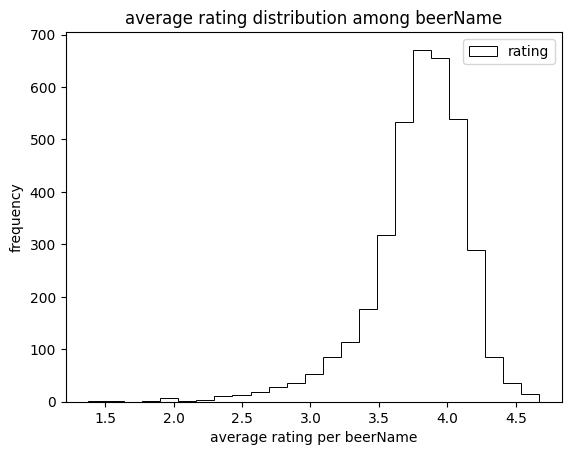

In [51]:
import matplotlib.pyplot as plt

print("> Primeras 5 entradas del dataframe:")
print(beer_df.head())
print()
print(f"> Hay {beer_df['userId'].unique().shape[0]} usuarios en los datos")
print()
print(f"> Hay {beer_df['beerId'].unique().shape[0]} productos en los datos")
print()
print(f"> Hay {beer_df['rating'].unique().shape[0]} calificaciones distintas:\n    "\
      f"{sorted(beer_df['rating'].unique())}")
print()
# Me da la impresión de que la idea es ver cuáles cervezas no tienen calificación por usuario.
# Pero no se puede ver sin hacer primero el pivot_table o una operación engorrosa.
# Y la pregunta se puede interpretar también como cantidad de null y nan.
# Arriba ya vi que eran cero. Dejo esta respuesta de todas formas.
print(f"> Hay {beer_df['rating'].isnull().sum()} calificaciones faltantes y "\
      f"{beer_df['rating'].isna().sum()} calificaciones no válidas")
print()
print(f"> Calificación media por usuaries: {beer_df['rating'].mean()}")
print()
average_ratings = beer_df.groupby('beerName')['rating'].mean().reset_index()
COUNT = 0
HEAD = 5
print(f"> Calificación media por producto (hasta {HEAD}):")
for idx, avg_rat in average_ratings.iterrows():
    if COUNT < HEAD:
      print(f"  - {avg_rat['beerName']}: {avg_rat['rating']}")
      COUNT += 1
print()
print(f"> Histograma de la distribución de puntuaciones promedio por beerName:")
average_ratings.plot.hist(bins=25, histtype='step', color='k', lw=.7)
plt.xlabel("average rating per beerName")
plt.ylabel("frequency")
plt.title("average rating distribution among beerName")
plt.show()

In [52]:
# user product matrix
user_product_mx = beer_df.pivot_table(index='userId', columns='beerName', values='rating')
print("> Resultados:")
user_product_mx

> Resultados:


beerName,"""Shabadoo"" Black & Tan Ale",# 100,#9,'t Gaverhopke Extra,'t Smisje Calva Reserva,(512) Pecan Porter,10 Commandments,10 Squared Fish Tale Ale,10.0,1000 IBU,...,Žatec,§ucaba (Abacus),Édition 2005,Éphémère (Apple),Éphémère (Cassis / Black Currant),Éphémère (Cranberry),Équinoxe Du Printemps,Ølfabrikken Porter,Über Pils,ÜberSun (Imperial Summer Wheat Beer)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl, en realidad es homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [53]:
# bag of words
bow_df = beer_df[['beerId', 'beerName', 'beerStyle']].drop_duplicates()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = True,
                             min_df = 10,
                             stop_words = 'english')
bow = vectorizer.fit_transform(bow_df['beerStyle']).toarray() # vectorize text
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # to dataframe

bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Looking for 'Chocolate Porter'

# Get the beer styles and sort them alphabetically
sorted_beer_types = sorted(beer_df["beerStyle"].unique())

# Print the sorted beer styles
print("> All beer styles:")
for type in sorted_beer_types:
    print(type)

print()

# Get the beer names and sort them alphabetically
sorted_beer_names = sorted(beer_df["beerName"].unique())

# Print the sorted beer names
print("> All beer names:")
for name in sorted_beer_names:
    print(name)

# It seems that 'Chocolate Porter' does not exist either as beerStyle nor beerType

> All beer styles:
Altbier
American Adjunct Lager
American Amber / Red Ale
American Amber / Red Lager
American Barleywine
American Black Ale
American Blonde Ale
American Brown Ale
American Dark Wheat Ale
American Double / Imperial IPA
American Double / Imperial Pilsner
American Double / Imperial Stout
American IPA
American Malt Liquor
American Pale Ale (APA)
American Pale Lager
American Pale Wheat Ale
American Porter
American Stout
American Strong Ale
American Wild Ale
Baltic Porter
Belgian Dark Ale
Belgian IPA
Belgian Pale Ale
Belgian Strong Dark Ale
Belgian Strong Pale Ale
Berliner Weissbier
Bière de Champagne / Bière Brut
Bière de Garde
Black & Tan
Bock
Braggot
California Common / Steam Beer
Chile Beer
Cream Ale
Czech Pilsener
Doppelbock
Dortmunder / Export Lager
Dubbel
Dunkelweizen
Eisbock
English Barleywine
English Bitter
English Brown Ale
English Dark Mild Ale
English India Pale Ale (IPA)
English Pale Ale
English Pale Mild Ale
English Porter
English Stout
English Strong Ale
Euro 

In [56]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# create dict style -> name
beer_name_to_style = dict(zip(beer_df['beerName'], beer_df['beerStyle']))

# store cosine similarity
cosine_sim = cosine_similarity(bow,bow)

# define get_similar function
def get_similar(df: pd.DataFrame, brand: str, k=5):

    style = beer_name_to_style[brand]
    
    # get index for self beer style from provided dataframe
    try:
        idx = df[df['beerStyle'] == style].index[0]
    except IndexError:
        return None
    
    # get row from cosine_sim that corresponds to the wanted beer style
    sim_scores = cosine_sim[idx]

    # each column represents the similarity to another beer syle
    # i want the indices that would sort the array
    sim_scores_sorted_indices = np.argsort(sim_scores)[::-1]

    # get top k indices except top 1 (it is self)
    top_k_idx = sim_scores_sorted_indices[1:k+1]
    
    # return the top k beerName s
    return df['beerName'].iloc[top_k_idx].values

# As mentioned earlier, it seems Chocolate Porter does not exist
# I'm using American Black Ale to demonstrate that the code works
print("> Top 3 recommended beers for brand '60 Minute IPA':")
print(get_similar(bow_df, '60 Minute IPA', k=3))
print()
# Since beerName Chocolate Porter does not exist, no beerStyle
# exists and a recommendation cannot be made

> Top 3 recommended beers for brand '60 Minute IPA':
['Harpoon IPA' 'Two Hearted Ale' 'Resistance IPA']



In [57]:
top_homer_beer = beer_df[beer_df['userId'] == 100].sort_values(by="rating", ascending=False)[["beerName", "beerStyle"]].iloc[0]

print("> Carl's (Homer's) favourite beer:")
print(f"  - Beer: {top_homer_beer['beerName']}")
print(f"  - Style: {top_homer_beer['beerStyle']}")

> Carl's (Homer's) favourite beer:
  - Beer: McNeill's Firehouse Amber Ale
  - Style: American Amber / Red Ale


In [58]:
print("> Top 3 recommended beer brands for Carl (Homer):")
print(get_similar(bow_df, top_homer_beer['beerName'], k=3))

> Top 3 recommended beer brands for Carl (Homer):
['Hoogstraten Poorter' 'Fade To Black Volume 2 - Smoked Baltic Porter'
 'Okocim Porter']


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? (si) [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [59]:
# transform df to pandas
from surprise import Dataset, Reader

reader = Reader(rating_scale = (1,5))

beer_ds = Dataset.load_from_df(beer_df[['userId','beerId','rating']], reader)
beer_ds

In [60]:
# train test split
from surprise.model_selection import train_test_split

train_set, test_set = train_test_split(beer_ds, test_size=.3, random_state=42)

In [61]:
# train KNNBasic based on users and cosine similarity
from surprise import KNNBasic

# similarity options
sim_option_ = {
    'name':'cosine', 'user_based':True,
}
# KNN parameters
k_ = 15
min_k_ = 5

model = KNNBasic(
    k = k_, min_k = min_k_, sim_option=sim_option_
)

model.fit(train_set)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [62]:
# predictions
predictions_ = model.test(test_set)

In [63]:
# MAE
from surprise import accuracy

accuracy.mae(predictions=predictions_)

MAE:  0.4751


0.4751222753035944

In [64]:
# Repeat but based on items

# similarity options
sim_option_ = {
    'name':'cosine', 'user_based':False,
}
# KNN parameters
k_ = 15
min_k_ = 5

model = KNNBasic(
    k = k_, min_k = min_k_, sim_option=sim_option_
)

model.fit(train_set)

# predictions
predictions_ = model.test(test_set)
print(pd.DataFrame(predictions_))

# MAE
print(accuracy.mae(predictions=predictions_))


Computing the msd similarity matrix...
Done computing similarity matrix.
        uid    iid  r_ui       est                                    details
0      1628   9755   4.5  4.166667  {'actual_k': 15, 'was_impossible': False}
1       187    601   2.0  3.866667  {'actual_k': 15, 'was_impossible': False}
2       112    409   3.0  3.900000  {'actual_k': 15, 'was_impossible': False}
3       738   5051   4.0  4.033333  {'actual_k': 15, 'was_impossible': False}
4       141   4394   4.0  3.800000  {'actual_k': 15, 'was_impossible': False}
...     ...    ...   ...       ...                                        ...
88513  2681  48139   4.0  3.733333  {'actual_k': 15, 'was_impossible': False}
88514  1195   3349   3.0  3.633333  {'actual_k': 15, 'was_impossible': False}
88515   220  30228   4.0  3.966667  {'actual_k': 15, 'was_impossible': False}
88516    35   1193   4.0  4.000000  {'actual_k': 15, 'was_impossible': False}
88517   743   3960   4.0  3.966667  {'actual_k': 15, 'was_impossible'

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [65]:
# train NMF and predict
from surprise import NMF

model_nmf = NMF(
    random_state = 42
    )
model_nmf.fit(train_set)
predictions_nmf = model_nmf.test(test_set)

In [73]:
# calculate MAE
acc_nmf = accuracy.mae(predictions=predictions_nmf)

# show predictions
print("> Predictions:")
pd.DataFrame(predictions_nmf)

MAE:  0.4826
> Predictions:


,uid,iid,r_ui,est,details
0,1628,9755,4.5,3.682730,{'was_impossible': False}
1,187,601,2.0,3.714152,{'was_impossible': False}
2,112,409,3.0,3.973135,{'was_impossible': False}
3,738,5051,4.0,3.767895,{'was_impossible': False}
4,141,4394,4.0,3.910392,{'was_impossible': False}
...,...,...,...,...,...
88513,2681,48139,4.0,3.839448,{'was_impossible': False}
88514,1195,3349,3.0,3.535059,{'was_impossible': False}
88515,220,30228,4.0,3.871429,{'was_impossible': False}
88516,35,1193,4.0,3.672390,{'was_impossible': False}


In [67]:
# SVD
from surprise.prediction_algorithms.matrix_factorization import SVD

model_svd = SVD(
    random_state=42
    )
model_svd.fit(train_set)
predictions_svd = model_svd.test(test_set)

In [74]:
# calculate MAE
acc_svd = accuracy.mae(predictions=predictions_svd)

# show predictions
print("> Predictions:")
pd.DataFrame(predictions_svd)

MAE:  0.4610
> Predictions:


,uid,iid,r_ui,est,details
0,1628,9755,4.5,4.022229,{'was_impossible': False}
1,187,601,2.0,3.807105,{'was_impossible': False}
2,112,409,3.0,3.885699,{'was_impossible': False}
3,738,5051,4.0,4.014968,{'was_impossible': False}
4,141,4394,4.0,3.926274,{'was_impossible': False}
...,...,...,...,...,...
88513,2681,48139,4.0,3.934257,{'was_impossible': False}
88514,1195,3349,3.0,3.584511,{'was_impossible': False}
88515,220,30228,4.0,3.872174,{'was_impossible': False}
88516,35,1193,4.0,3.901377,{'was_impossible': False}


**Comparación:**

In [84]:
str_ = f"""
As the only required benchmark for this part is the mean absolute error, we can conclude that
the SVD model, with MAE = {acc_svd:.4f}, performs better than the NMF model, with MAE = {acc_nmf:.4f}.

This is true for both models using default values and a seed of 42. Therefore, it is still
possible for NMF to outperform SVD if hyperparameters were to be tuned. However, SVD could
reasonably be expected to perform better than NMF in most cases, as the number of columns far
exceeds the number of rows, and NMF struggles with complex relationships between user inter-
actions. SVD, being an exact method, provides better accuracy and generalisation.

I got all of that from here:
[https://medium.com/@_monitsharma/computational-linear-algebra-topic-modelling-with-nmf-and-svd-d07c83e4f006]
"""

print(str_)


As the only required benchmark for this part is the mean absolute error, we can conclude that
the SVD model, with MAE = 0.4610, performs better than the NMF model, with MAE = 0.4826.

This is true for both models using default values and a seed of 42. Therefore, it is still
possible for NMF to outperform SVD if hyperparameters were to be tuned. However, SVD could
reasonably be expected to perform better than NMF in most cases, as the number of columns far
exceeds the number of rows, and NMF struggles with complex relationships between user inter-
actions. SVD, being an exact method, provides better accuracy and generalisation.

I got all of that from here:
[https://medium.com/@_monitsharma/computational-linear-algebra-topic-modelling-with-nmf-and-svd-d07c83e4f006]



## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [69]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [97]:
# 1.
from collections import defaultdict

# create dict id -> name
beer_id_to_name = dict(zip(beer_df['beerId'], beer_df['beerName']))

def get_top_n(
        preds, # predictions input
        n=10,
        id_to_name=None
        ):

    # create defaultdic
    # defaultdic automatically assigns default values to not-yet existing keys
    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in preds:
        # check if item already exists
        # since it is a defaultdict this won't raise key errors
        if iid not in [item for item, _ in top_n[uid]]:
            top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        # sort according to est
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        # write top n to top_n
        top_n[uid] = user_ratings[:n]

    if id_to_name:
        for uid in top_n:
            top_n[uid] = [(id_to_name[iid], est) for iid, est in top_n[uid]]

    return top_n

top_n_recommendations = get_top_n(predictions_svd, n=3, id_to_name=beer_id_to_name)[100]
print("> Recommended brands for Carl:")
for recommendation in top_n_recommendations:
    print(f"  - Brand {recommendation[0]} with an estimated ranking of {recommendation[1]:.1f}")

> Recommended brands for Carl:
  - Brand McNeill's Firehouse Amber Ale with an estimated ranking of 3.9
  - Brand McNeill's Extra Special Bitter with an estimated ranking of 3.9
  - Brand McNeill's Dead Horse IPA with an estimated ranking of 3.8


In [98]:
# 2.
import random

random.seed(a=42)

trainset_full = beer_ds.build_full_trainset()
missing_ratings = trainset_full.build_anti_testset()

carl_missing_ratings = [rating for rating in missing_ratings if rating[0] == 100]

random_beers = random.sample(carl_missing_ratings, 5)

predictions_ = model_svd.test(random_beers)

print("> Predicted ratings for beers that Carl hasn't rated yet")
for pred in predictions_:
    beer_name = beer_id_to_name.get(pred.iid, "null")
    print(f"  - Brand {beer_name} with an estimated rating of: {pred.est:.2f}")

> Predicted ratings for beers that Carl hasn't rated yet
  - Brand Thunder Hole Ale with an estimated rating of: 3.74
  - Brand Dernière Volonté with an estimated rating of: 3.83
  - Brand Tank 7 Farmhouse Ale with an estimated rating of: 4.07
  - Brand Ommegang Aphrodite with an estimated rating of: 3.50
  - Brand Stone 13th Anniversary Ale with an estimated rating of: 3.79


In [145]:
precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

mean_precision = sum(precisions.values()) / len(precisions) if precisions else 0
mean_recall = sum(recalls.values()) / len(recalls) if recalls else 0

print(f'> Mean precision: {mean_precision:.4f}')
print(f'> Mean recall: {mean_recall:.4f}')

str_ = """
While precision appears to be reasonably high, a low recall indicates that the model
isn't accurately predicting the tastes of users. Low recall can be interpreted as the
model incorrectly thinking that a beer will not have a high score when it does, and
viceversa. Therefore, it doesn't seem to be a good enough model.
"""
print(str_)

> Mean precision: 0.7433
> Mean recall: 0.3399

While precision appears to be reasonably high, a low recall indicates that the model
isn't accurately predicting the tastes of users. Low recall can be interpreted as the
model incorrectly thinking that a beer will not have a high score when it does, and
viceversa. Therefore, it doesn't seem to be a good enough model.



> For k = 3:
  - Mean precision: 0.7439
  - Mean recall: 0.1349
> For k = 4:
  - Mean precision: 0.7421
  - Mean recall: 0.1743
> For k = 5:
  - Mean precision: 0.7445
  - Mean recall: 0.2112
> For k = 6:
  - Mean precision: 0.7450
  - Mean recall: 0.2449
> For k = 7:
  - Mean precision: 0.7434
  - Mean recall: 0.2739
> For k = 8:
  - Mean precision: 0.7424
  - Mean recall: 0.2995
> For k = 9:
  - Mean precision: 0.7434
  - Mean recall: 0.3210
> For k = 10:
  - Mean precision: 0.7433
  - Mean recall: 0.3399
> For k = 11:
  - Mean precision: 0.7422
  - Mean recall: 0.3560
> For k = 12:
  - Mean precision: 0.7403
  - Mean recall: 0.3700
> For k = 13:
  - Mean precision: 0.7401
  - Mean recall: 0.3838
> For k = 14:
  - Mean precision: 0.7389
  - Mean recall: 0.3958
> For k = 15:
  - Mean precision: 0.7375
  - Mean recall: 0.4070
> For k = 16:
  - Mean precision: 0.7369
  - Mean recall: 0.4179
> For k = 17:
  - Mean precision: 0.7368
  - Mean recall: 0.4281
> For k = 18:
  - Mean precision

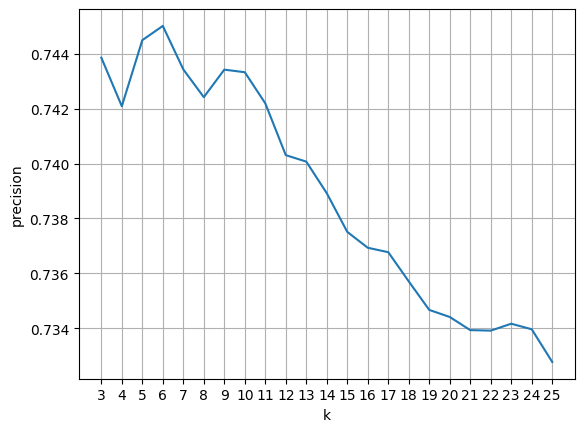

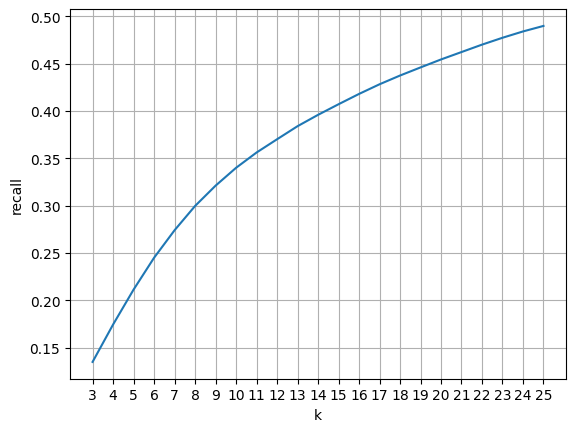


As k grows, these indicators simulate how the model performs as it recommends
k items to the user. There items tend to be those that have been estimated to
be rated higher by the user. The graph shows how precision varies around 0.743
until k=10, where it starts a steep decline.

It makes sense for recall to grow as k does, with more items being recommended.
As the total number of relevant items is fixed, the recommendation casts a
wider net and it's more likely to find 'truly' relevant items.



In [148]:
K_START = 3
K_STOP = 25

precision_k = []
recall_k = []

for k_ in range(K_START,K_STOP+1):
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k_, threshold=3.5)

    mean_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    mean_recall = sum(recalls.values()) / len(recalls) if recalls else 0

    print(f"> For k = {k_}:")
    precision_k.append(mean_precision)
    print(f'  - Mean precision: {mean_precision:.4f}')
    recall_k.append(mean_recall)
    print(f'  - Mean recall: {mean_recall:.4f}')

xlist = [k for k in range(K_START,K_STOP+1)]

plt.plot(xlist, precision_k)
plt.ylabel("precision")
plt.xlabel("k")
plt.xticks(xlist)
plt.grid()
plt.show()

plt.plot(xlist, recall_k)
plt.ylabel("recall")
plt.xlabel("k")
plt.xticks(xlist)
plt.grid()
plt.show()

str_ = """
As k grows, these indicators simulate how the model performs as it recommends
k items to the user. There items tend to be those that have been estimated to
be rated higher by the user. The graph shows how precision varies around 0.743
until k=10, where it starts a steep decline.

It makes sense for recall to grow as k does, with more items being recommended.
As the total number of relevant items is fixed, the recommendation casts a
wider net and it's more likely to find 'truly' relevant items.
"""
print(str_)

> For threshold = 3.0:
  - Mean precision: 0.8895
  - Mean recall: 0.4138
> For threshold = 3.1:
  - Mean precision: 0.7965
  - Mean recall: 0.4044
> For threshold = 3.2:
  - Mean precision: 0.7887
  - Mean recall: 0.3922
> For threshold = 3.3000000000000003:
  - Mean precision: 0.7789
  - Mean recall: 0.3801
> For threshold = 3.4000000000000004:
  - Mean precision: 0.7648
  - Mean recall: 0.3622
> For threshold = 3.5000000000000004:
  - Mean precision: 0.6016
  - Mean recall: 0.3409
> For threshold = 3.6000000000000005:
  - Mean precision: 0.5837
  - Mean recall: 0.3102
> For threshold = 3.7000000000000006:
  - Mean precision: 0.5553
  - Mean recall: 0.2765
> For threshold = 3.8000000000000007:
  - Mean precision: 0.5151
  - Mean recall: 0.2348
> For threshold = 3.900000000000001:
  - Mean precision: 0.4392
  - Mean recall: 0.1729
> For threshold = 4.000000000000001:
  - Mean precision: 0.1935
  - Mean recall: 0.1318
> For threshold = 4.100000000000001:
  - Mean precision: 0.1436
  - 

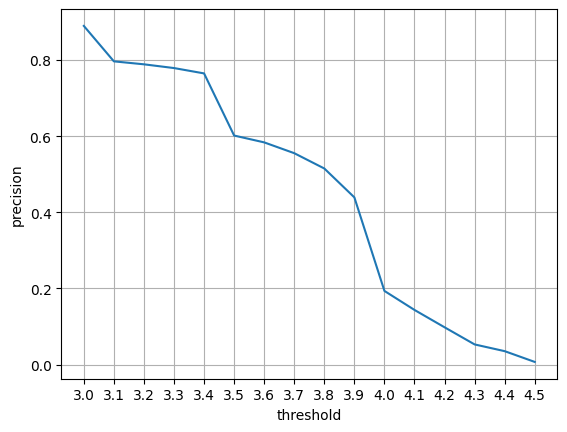

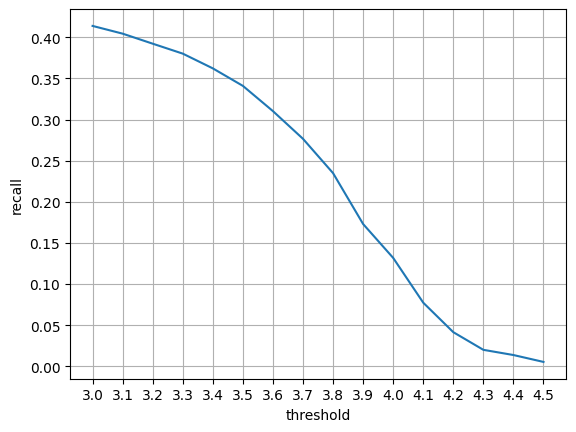


As the threshold grows, the tolerance for what is considered a relevant item
is increased. Therefore, by taking higher values for threshold, we are making
stricter judgments on what is considered a correct guess. Thus, it is natural
that both precision and recall are reduced as the parameter goes up.

The recall seems to be monotonically decreasing, while the precision shows
slight variations on the speed of its decrease. By inspection, a threshold of
3.5 (considering user ratings range from 1 to 5 with steps of .5) appears as 
a breaking point in the apparent behaviour of the slope of the curve for pre-
cision.



In [149]:
THRESHOLD_START = 3.
THRESHOLD_STOP = 4.5

precision_threshold = []
recall_threshold = []

threshold_arr = np.arange(THRESHOLD_START, THRESHOLD_STOP + 0.1, 0.1)

for t_ in threshold_arr:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=t_)

    mean_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    mean_recall = sum(recalls.values()) / len(recalls) if recalls else 0

    print(f"> For threshold = {t_}:")
    precision_threshold.append(mean_precision)
    print(f'  - Mean precision: {mean_precision:.4f}')
    recall_threshold.append(mean_recall)
    print(f'  - Mean recall: {mean_recall:.4f}')

plt.plot(threshold_arr, precision_threshold)
plt.ylabel("precision")
plt.xlabel("threshold")
plt.xticks(threshold_arr)
plt.grid()
plt.show()

plt.plot(threshold_arr, recall_threshold)
plt.ylabel("recall")
plt.xlabel("threshold")
plt.xticks(threshold_arr)
plt.grid()
plt.show()

str_ = """
As the threshold grows, the tolerance for what is considered a relevant item
is increased. Therefore, by taking higher values for threshold, we are making
stricter judgments on what is considered a correct guess. Thus, it is natural
that both precision and recall are reduced as the parameter goes up.

The recall seems to be monotonically decreasing, while the precision shows
slight variations on the speed of its decrease. By inspection, a threshold of
3.5 (considering user ratings range from 1 to 5 with steps of .5) appears as 
a breaking point in the apparent behaviour of the slope of the curve for pre-
cision.
"""
print(str_)

In [141]:
missing_ratings = trainset_full.build_anti_testset()

predictions_ = model_svd.test(missing_ratings)

predictions_df = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in predictions_], 
                              columns=['userId', 'beerId', 'predicted_rating'])

original_ratings = beer_df[['userId', 'beerId', 'rating']]

full_ratings_df = pd.merge(original_ratings, predictions_df, on=['userId', 'beerId'], how='left')

# Update null elements with value in the same location in other.
full_ratings_df['rating'] = full_ratings_df['rating'].combine_first(full_ratings_df['predicted_rating'])

# Create a spreadsheet-style pivot table as a DataFrame.
user_item_matrix = full_ratings_df.pivot_table(index='userId', columns='beerId', values='rating')

print("> User-Item matrix with zeroes where an estimated score could not be obtained:")
print(user_item_matrix.fillna(0))


> User-Item matrix with zeroes where an estimated score could not be obtained:
beerId  5         6         7         9         10        11        14     \
userId                                                                      
1       0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3       3.395  3.765217  3.256849  3.478261  0.000000  0.000000  0.000000   
4       0.000  0.000000  0.000000  0.000000  3.791908  0.000000  0.000000   
5       0.000  0.000000  0.000000  0.000000  0.000000  3.431818  0.000000   
6       0.000  0.000000  0.000000  0.000000  0.000000  0.000000  3.892157   
...       ...       ...       ...       ...       ...       ...       ...   
24903   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25317   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25923   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27039   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
